# TELL Analysis of June-July 2006 Heat Wave

This notebook processes and makes plots of the temporal evolution of load during the course of the June-July 2006 heat wave in the western U.S.

In [1]:
# Start by importing required packages and information about your operating system:
import os 
import datetime

import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from datetime import timedelta


## Set the Directory Structure

In [2]:
# Identify the top-level data input and output directories:
tell_data_input_dir =  '/Users/burl878/Documents/Code/code_repos/ntp_heat_wave/data/tell_data/'
data_output_dir =  '/Users/burl878/Documents/Code/code_repos/ntp_heat_wave/data'
image_output_dir =  '/Users/burl878/Documents/Code/code_repos/ntp_heat_wave/plots'

# If the "data_output_dir" subdirectory doesn't exist then create it:
if not os.path.exists(data_output_dir):
   os.makedirs(data_output_dir)

# If the "image_output_dir" subdirectory doesn't exist then create it:
if not os.path.exists(image_output_dir):
   os.makedirs(image_output_dir)


## Set the Balancing Authority and Scenario You Want to Plot

In [3]:
# Give the abbreviation for the BA you want to analyze:
ba_to_plot = 'PSCO'

# Set the scenario you want to analyze:
scenario = 'without_population_effects'


## Process the Load Data for Time Series Plotting

In [4]:
# Read in the historical load data:
if scenario == 'with_population_effects': 
   hist_df = pd.read_csv((tell_data_input_dir + 'with_population_effects/' + 'BA_Loads_2006_With_Population_Effects.csv'))
   fut_df = pd.read_csv((tell_data_input_dir + 'with_population_effects/' + 'BA_Loads_2046_With_Population_Effects.csv'))
else:
   hist_df = pd.read_csv((tell_data_input_dir + 'without_population_effects/' + 'BA_Loads_2006_Without_Population_Effects.csv'))
   fut_df = pd.read_csv((tell_data_input_dir + 'without_population_effects/' + 'BA_Loads_2046_Without_Population_Effects.csv'))
    

hist_df = hist_df.loc[hist_df['BA'].isin([ba_to_plot])].copy()
hist_df['Year'] = pd.DatetimeIndex(hist_df['Time_UTC']).year
hist_df['Month'] = pd.DatetimeIndex(hist_df['Time_UTC']).month
hist_df['Day'] = pd.DatetimeIndex(hist_df['Time_UTC']).day
hist_df['Hour'] = pd.DatetimeIndex(hist_df['Time_UTC']).hour

fut_df = fut_df.loc[fut_df['BA'].isin([ba_to_plot])].copy()
fut_df['Year'] = pd.DatetimeIndex(fut_df['Time_UTC']).year
fut_df['Month'] = pd.DatetimeIndex(fut_df['Time_UTC']).month
fut_df['Day'] = pd.DatetimeIndex(fut_df['Time_UTC']).day
fut_df['Hour'] = pd.DatetimeIndex(fut_df['Time_UTC']).hour
    
plot_df = pd.merge(hist_df, fut_df, how='left', on=['BA', 'Month', 'Day', 'Hour'])
plot_df['date'] = plot_df[["Year_x","Month","Day","Hour"]].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
plot_df['Time_UTC'] = pd.to_datetime(plot_df['date'], format='%Y-%m-%d-%H')

# Compute the normalized loads:
plot_df['rcp45cooler_ssp3_norm'] = 100 * (plot_df['rcp45cooler_ssp3'].div(plot_df['historic']) - 1)
plot_df['rcp45cooler_ssp5_norm'] = 100 * (plot_df['rcp45cooler_ssp5'].div(plot_df['historic']) - 1)
plot_df['rcp45hotter_ssp3_norm'] = 100 * (plot_df['rcp45hotter_ssp3'].div(plot_df['historic']) - 1)
plot_df['rcp45hotter_ssp5_norm'] = 100 * (plot_df['rcp45hotter_ssp5'].div(plot_df['historic']) - 1)
plot_df['rcp85cooler_ssp3_norm'] = 100 * (plot_df['rcp85cooler_ssp3'].div(plot_df['historic']) - 1)
plot_df['rcp85cooler_ssp5_norm'] = 100 * (plot_df['rcp85cooler_ssp5'].div(plot_df['historic']) - 1)
plot_df['rcp85hotter_ssp3_norm'] = 100 * (plot_df['rcp85hotter_ssp3'].div(plot_df['historic']) - 1)
plot_df['rcp85hotter_ssp5_norm'] = 100 * (plot_df['rcp85hotter_ssp5'].div(plot_df['historic']) - 1)

# Only keep the columns that are needed:
plot_df = plot_df[['Time_UTC', 'historic', 
                   'rcp45cooler_ssp3', 'rcp45cooler_ssp3_norm', 
                   'rcp45cooler_ssp5', 'rcp45cooler_ssp5_norm',
                   'rcp45hotter_ssp3', 'rcp45hotter_ssp3_norm',
                   'rcp45hotter_ssp5', 'rcp45hotter_ssp5_norm',
                   'rcp85cooler_ssp3', 'rcp85cooler_ssp3_norm', 
                   'rcp85cooler_ssp5', 'rcp85cooler_ssp5_norm',
                   'rcp85hotter_ssp3', 'rcp85hotter_ssp3_norm',
                   'rcp85hotter_ssp5', 'rcp85hotter_ssp5_norm']].copy()

# Compute the date of the peak historical load:
peak_day = plot_df['Time_UTC'].loc[plot_df['historic'].idxmax()] 
min_date = pd.to_datetime(peak_day) - timedelta(days=3.5)
max_date = pd.to_datetime(peak_day) + timedelta(days=3.5)

# Compute the annual minimum and maximum loads:
min_load = 0.95*plot_df['historic'].min()
max_load = 1.05*plot_df['historic'].max()

# Return the dataframe:
plot_df


,Time_UTC,historic,rcp45cooler_ssp3,rcp45cooler_ssp3_norm,rcp45cooler_ssp5,rcp45cooler_ssp5_norm,rcp45hotter_ssp3,rcp45hotter_ssp3_norm,rcp45hotter_ssp5,rcp45hotter_ssp5_norm,rcp85cooler_ssp3,rcp85cooler_ssp3_norm,rcp85cooler_ssp5,rcp85cooler_ssp5_norm,rcp85hotter_ssp3,rcp85hotter_ssp3_norm,rcp85hotter_ssp5,rcp85hotter_ssp5_norm
0,2006-01-01 00:00:00,4952.78,4960.45,0.154863,4942.24,-0.212810,4952.34,-0.008884,4936.03,-0.338194,4950.53,-0.045429,4934.22,-0.374739,4952.81,0.000606,4943.42,-0.188985
1,2006-01-01 01:00:00,5184.81,5133.56,-0.988464,5107.90,-1.483372,5112.62,-1.392336,5092.01,-1.789844,5109.59,-1.450776,5087.37,-1.879336,5097.91,-1.676050,5073.35,-2.149741
2,2006-01-01 02:00:00,5371.37,5292.53,-1.467782,5271.64,-1.856696,5278.77,-1.723955,5257.72,-2.115848,5272.55,-1.839754,5249.97,-2.260131,5266.92,-1.944569,5245.87,-2.336462
3,2006-01-01 03:00:00,5434.89,5235.58,-3.667232,5218.80,-3.975977,5226.64,-3.831724,5209.49,-4.147278,5238.49,-3.613689,5222.40,-3.909739,5210.44,-4.129798,5194.75,-4.418489
4,2006-01-01 04:00:00,5247.15,5030.64,-4.126240,5019.57,-4.337212,5004.86,-4.617554,4991.98,-4.863021,5013.75,-4.448129,4999.52,-4.719324,4989.98,-4.901137,4976.10,-5.165661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2006-12-31 19:00:00,5159.25,5456.26,5.756845,5446.80,5.573485,5454.10,5.714978,5445.61,5.550419,5456.12,5.754131,5446.85,5.574454,5446.72,5.571934,5441.32,5.467268
8756,2006-12-31 20:00:00,5126.25,5419.41,5.718800,5409.57,5.526847,5416.62,5.664375,5408.22,5.500512,5416.78,5.667496,5406.86,5.473982,5407.21,5.480810,5400.35,5.346989
8757,2006-12-31 21:00:00,5090.58,5383.67,5.757497,5375.95,5.605845,5382.76,5.739621,5375.96,5.606041,5383.07,5.745711,5375.92,5.605255,5380.97,5.704458,5377.67,5.639632
8758,2006-12-31 22:00:00,5086.80,5404.58,6.247149,5402.56,6.207439,5399.06,6.138633,5397.77,6.113274,5404.74,6.250295,5402.16,6.199575,5399.55,6.148266,5402.13,6.198986


## Make the Time Series Plots

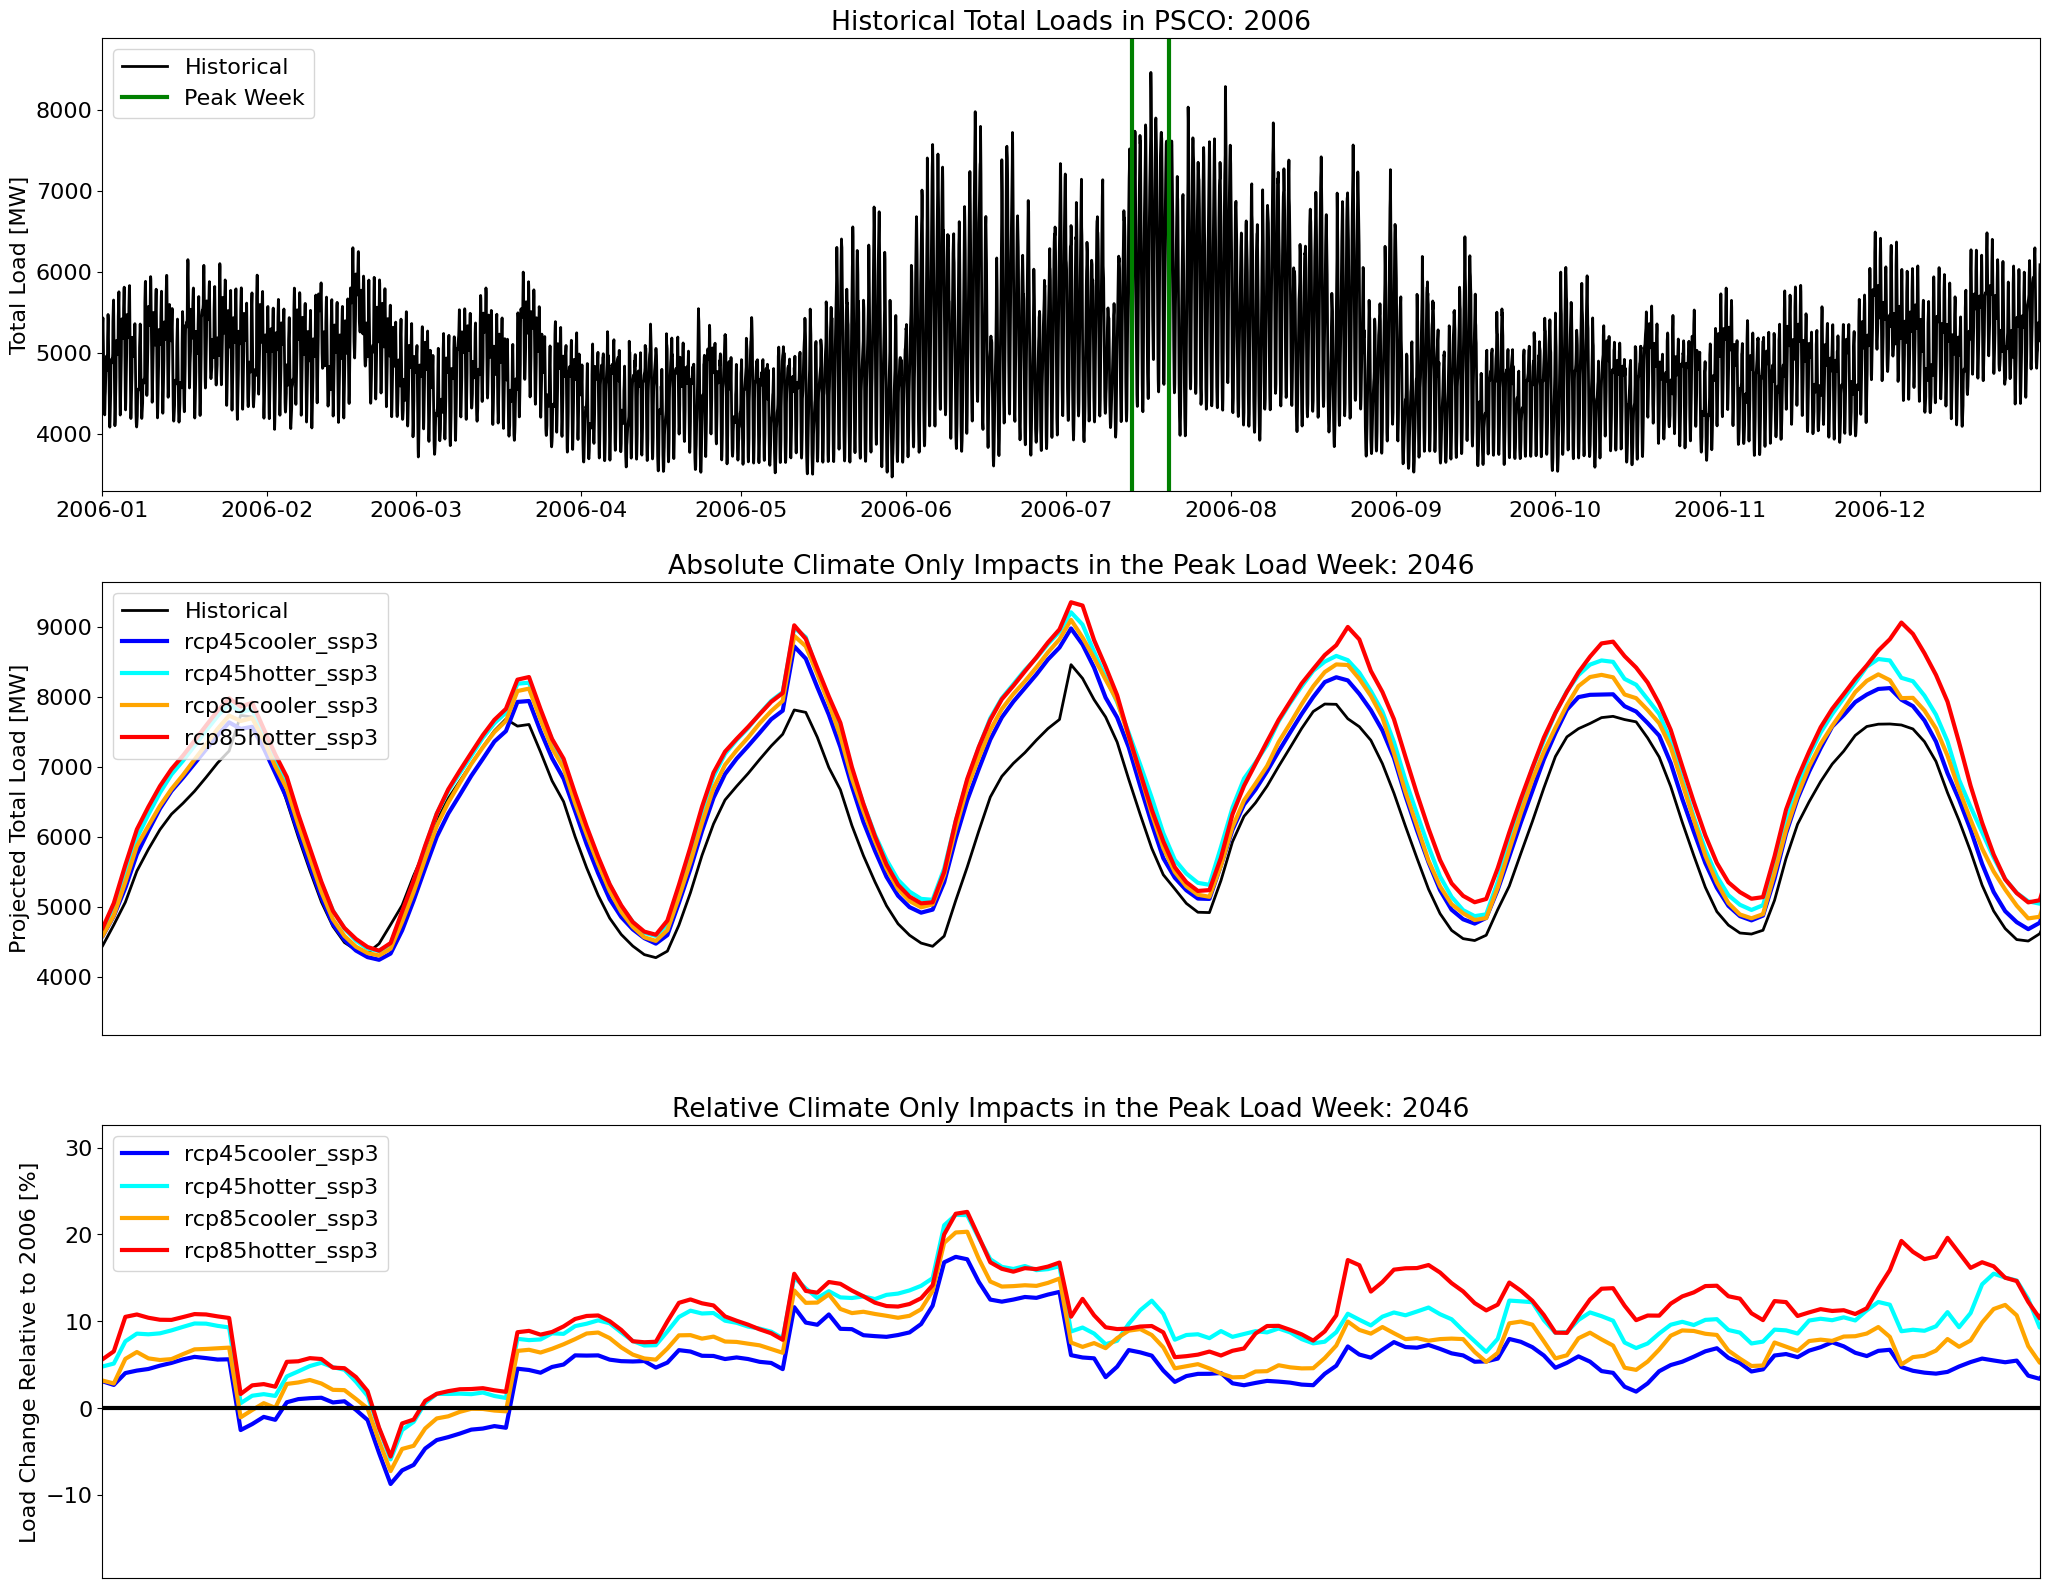

In [5]:
# Make the plot:
plt.figure(figsize=(25, 20))
plt.rcParams['font.size'] = 16
plt.subplot(3,1,1)
plt.plot(plot_df['Time_UTC'], plot_df['historic'], color='k', linestyle='-', label='Historical', linewidth=2)
plt.plot([min_date, min_date], [min_load, max_load], color='g', linestyle='-', label='Peak Week', linewidth=3)
plt.plot([max_date, max_date], [min_load, max_load], color='g', linestyle='-', linewidth=3)
plt.ylim([min_load, max_load])
plt.xlim([datetime.date(2006, 1, 1), datetime.date(2006, 12, 31)])
plt.legend(loc='upper left')
plt.xlabel('')
plt.ylabel('Total Load [MW]')
plt.title(('Historical Total Loads in ' + ba_to_plot + ': 2006'))

plt.subplot(3,1,2)
plt.plot(plot_df['Time_UTC'], plot_df['historic'], color='k', linestyle='-', label='Historical', linewidth=2)
if scenario == 'with_population_effects':
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45cooler_ssp3'], color='b', linestyle='-', label='rcp45cooler_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45cooler_ssp5'], color='b', linestyle=':', label='rcp45cooler_ssp5', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45hotter_ssp3'], color='cyan', linestyle='-', label='rcp45hotter_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45hotter_ssp5'], color='cyan', linestyle=':', label='rcp45hotter_ssp5', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85cooler_ssp3'], color='orange', linestyle='-', label='rcp85cooler_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85cooler_ssp5'], color='orange', linestyle=':', label='rcp85cooler_ssp5', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85hotter_ssp3'], color='red', linestyle='-', label='rcp85hotter_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85hotter_ssp5'], color='red', linestyle=':', label='rcp85hotter_ssp5', linewidth=3)
else:
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45cooler_ssp3'], color='b', linestyle='-', label='rcp45cooler_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45hotter_ssp3'], color='cyan', linestyle='-', label='rcp45hotter_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85cooler_ssp3'], color='orange', linestyle='-', label='rcp85cooler_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85hotter_ssp3'], color='red', linestyle='-', label='rcp85hotter_ssp3', linewidth=3)
plt.xlim([min_date, max_date])
plt.legend(loc='upper left')
plt.xticks([])
plt.xlabel('')
plt.ylabel('Projected Total Load [MW]')
if scenario == 'with_population_effects':
   plt.title(('Absolute Climate and Socioeconomic Impacts in the Peak Load Week: 2046'))
else:
   plt.title(('Absolute Climate Only Impacts in the Peak Load Week: 2046'))

plt.subplot(3,1,3)
if scenario == 'with_population_effects':
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45cooler_ssp3_norm'], color='b', linestyle='-', label='rcp45cooler_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45cooler_ssp5_norm'], color='b', linestyle=':', label='rcp45cooler_ssp5', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45hotter_ssp3_norm'], color='cyan', linestyle='-', label='rcp45hotter_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45hotter_ssp5_norm'], color='cyan', linestyle=':', label='rcp45hotter_ssp5', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85cooler_ssp3_norm'], color='orange', linestyle='-', label='rcp85cooler_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85cooler_ssp5_norm'], color='orange', linestyle=':', label='rcp85cooler_ssp5', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85hotter_ssp3_norm'], color='red', linestyle='-', label='rcp85hotter_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85hotter_ssp5_norm'], color='red', linestyle=':', label='rcp85hotter_ssp5', linewidth=3)
else:
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45cooler_ssp3_norm'], color='b', linestyle='-', label='rcp45cooler_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp45hotter_ssp3_norm'], color='cyan', linestyle='-', label='rcp45hotter_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85cooler_ssp3_norm'], color='orange', linestyle='-', label='rcp85cooler_ssp3', linewidth=3)
   plt.plot(plot_df['Time_UTC'], plot_df['rcp85hotter_ssp3_norm'], color='red', linestyle='-', label='rcp85hotter_ssp3', linewidth=3)
plt.plot([min_date, max_date], [0, 0], color='k', linestyle='-', linewidth=3)
plt.xlim([min_date, max_date])
plt.legend(loc='upper left')
plt.xticks([])
plt.xlabel('')
plt.ylabel('Load Change Relative to 2006 [%]')
if scenario == 'with_population_effects':
   plt.title(('Relative Climate and Socioeconomic Impacts in the Peak Load Week: 2046'))
else:
   plt.title(('Relative Climate Only Impacts in the Peak Load Week: 2046'))

if scenario == 'with_population_effects':
   filename = ('2006_heatwave_' + ba_to_plot + '_with_population_effects.png')
else:
   filename = ('2006_heatwave_' + ba_to_plot + '_without_population_effects.png')

plt.savefig(os.path.join(image_output_dir, filename), dpi=300, bbox_inches='tight', facecolor='white')


## Process the Load Data for BA Histogram Plots

In [7]:
# Set the scenario you want to analyze:
scenario_to_analze = 'rcp45cooler_ssp3'


In [43]:
# Read in the historical load data with population effects:
hist_with_df = pd.read_csv((tell_data_input_dir + 'with_population_effects/' + 'BA_Loads_2006_With_Population_Effects.csv'))
hist_with_df.rename(columns={'historic': 'historic_with_pop'}, inplace=True)
hist_with_df['Year'] = pd.DatetimeIndex(hist_with_df['Time_UTC']).year
hist_with_df['Month'] = pd.DatetimeIndex(hist_with_df['Time_UTC']).month
hist_with_df['Day'] = pd.DatetimeIndex(hist_with_df['Time_UTC']).day
hist_with_df['Hour'] = pd.DatetimeIndex(hist_with_df['Time_UTC']).hour

# Read in the projected load data with population effects:
fut_with_df = pd.read_csv((tell_data_input_dir + 'with_population_effects/' + 'BA_Loads_2046_With_Population_Effects.csv'))
fut_with_df = fut_with_df[['BA', 'Time_UTC', scenario_to_analze]].copy()
fut_with_df.rename(columns={scenario_to_analze: 'future_with_pop'}, inplace=True)
fut_with_df['Year'] = pd.DatetimeIndex(fut_with_df['Time_UTC']).year
fut_with_df['Month'] = pd.DatetimeIndex(fut_with_df['Time_UTC']).month
fut_with_df['Day'] = pd.DatetimeIndex(fut_with_df['Time_UTC']).day
fut_with_df['Hour'] = pd.DatetimeIndex(fut_with_df['Time_UTC']).hour
    
# Read in the historical load data without population effects:
hist_without_df = pd.read_csv((tell_data_input_dir + 'without_population_effects/' + 'BA_Loads_2006_Without_Population_Effects.csv'))
hist_without_df.rename(columns={'historic': 'historic_without_pop'}, inplace=True)
hist_without_df['Year'] = pd.DatetimeIndex(hist_without_df['Time_UTC']).year
hist_without_df['Month'] = pd.DatetimeIndex(hist_without_df['Time_UTC']).month
hist_without_df['Day'] = pd.DatetimeIndex(hist_without_df['Time_UTC']).day
hist_without_df['Hour'] = pd.DatetimeIndex(hist_without_df['Time_UTC']).hour

# Read in the projected load data without population effects:
fut_without_df = pd.read_csv((tell_data_input_dir + 'without_population_effects/' + 'BA_Loads_2046_Without_Population_Effects.csv'))
fut_without_df = fut_without_df[['BA', 'Time_UTC', scenario_to_analze]].copy()
fut_without_df.rename(columns={scenario_to_analze: 'future_without_pop'}, inplace=True)
fut_without_df['Year'] = pd.DatetimeIndex(fut_without_df['Time_UTC']).year
fut_without_df['Month'] = pd.DatetimeIndex(fut_without_df['Time_UTC']).month
fut_without_df['Day'] = pd.DatetimeIndex(fut_without_df['Time_UTC']).day
fut_without_df['Hour'] = pd.DatetimeIndex(fut_without_df['Time_UTC']).hour

# Merge the datasets together based on common BA, year, month, day, and hour combinations:
analysis_df = pd.merge(hist_with_df, fut_with_df, how='left', on=['BA', 'Month', 'Day', 'Hour'])
analysis_df = analysis_df[['BA', 'Year_x', 'Month', 'Day', 'Hour', 'historic_with_pop', 'future_with_pop']].copy()
analysis_df = pd.merge(analysis_df, hist_without_df, how='left', on=['BA', 'Month', 'Day', 'Hour'])
analysis_df = analysis_df[['BA', 'Year_x', 'Month', 'Day', 'Hour', 'historic_with_pop', 'future_with_pop', 'historic_without_pop']].copy()
analysis_df = pd.merge(analysis_df, fut_without_df, how='left', on=['BA', 'Month', 'Day', 'Hour'])
analysis_df = analysis_df[['BA', 'Year_x', 'Month', 'Day', 'Hour', 'historic_with_pop', 'future_with_pop', 'historic_without_pop', 'future_without_pop']].copy()

# Convert the time to a datetime variable:
analysis_df['date'] = analysis_df[['Year_x', 'Month', 'Day', 'Hour']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
analysis_df['Time_UTC'] = pd.to_datetime(analysis_df['date'], format='%Y-%m-%d-%H')

# Compute the normalized loads:
analysis_df['norm_with_pop'] = 100 * (analysis_df['future_with_pop'].div(analysis_df['historic_with_pop']) - 1)
analysis_df['norm_without_pop'] = 100 * (analysis_df['future_without_pop'].div(analysis_df['historic_without_pop']) - 1)

# Only keep the columns that are needed:
analysis_df = analysis_df[['BA', 'Time_UTC', 
                           'historic_with_pop', 'future_with_pop', 'norm_with_pop',
                           'historic_without_pop', 'future_without_pop', 'norm_without_pop']].copy()

analysis_df


,BA,Time_UTC,historic_with_pop,future_with_pop,norm_with_pop,historic_without_pop,future_without_pop,norm_without_pop
0,AEC,2006-01-01 00:00:00,514.68,479.17,-6.899433,477.82,444.65,-6.941945
1,AEC,2006-01-01 01:00:00,545.04,498.19,-8.595699,506.01,462.30,-8.638169
2,AEC,2006-01-01 02:00:00,557.66,507.25,-9.039558,517.72,470.71,-9.080198
3,AEC,2006-01-01 03:00:00,537.29,471.33,-12.276424,498.81,437.37,-12.317315
4,AEC,2006-01-01 04:00:00,509.68,434.91,-14.669989,473.18,403.58,-14.708990
...,...,...,...,...,...,...,...,...
473035,WAUW,2006-12-31 19:00:00,85.61,97.78,14.215629,97.58,96.65,-0.953064
473036,WAUW,2006-12-31 20:00:00,84.50,97.15,14.970414,96.31,96.03,-0.290728
473037,WAUW,2006-12-31 21:00:00,83.49,97.01,16.193556,95.16,95.89,0.767129
473038,WAUW,2006-12-31 22:00:00,83.24,97.44,17.059106,94.88,96.32,1.517707
